In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd#pandasのインポート
import datetime#元データの日付処理のためにインポート
from sklearn.model_selection import train_test_split#データ分割用
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト

In [8]:
data = pd.read_csv('alldata.csv')
print(data[data['neck'] == 0].shape[0])
print(data[data['neck'] == 1].shape[0])

49
35


In [9]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data = pd.read_csv('test1019.csv')


X = data.drop(columns=['neck'])  # neck以外の全ての列を特徴量として使用
y = data['neck']  # neck列をターゲット変数として使用

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=420000)

# ランダムフォレストモデルの作成
model = RandomForestClassifier(random_state=1234)

# モデルの訓練
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# モデルの評価
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Accuracy: 0.6415
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.63      0.67        30
           1       0.58      0.65      0.61        23

    accuracy                           0.64        53
   macro avg       0.64      0.64      0.64        53
weighted avg       0.65      0.64      0.64        53



In [10]:
##必要な機能のimport。
import pandas as pd#　　　　　　　　　　　　　　　　　　    データフレームを扱うための機能。
from urllib.request import urlretrieve#　　　　　　　　   ネット上からファイルをダウンロードし保存するのに使う機能。
from sklearn.utils import all_estimators#　　            scitic-learnの全アルゴリズム。
from sklearn.model_selection import KFold#               K分割クロスバリデーション機能。
from sklearn.model_selection import cross_val_score#     クロスバリデーションのスコアを出力する機能。
import warnings#                                         警告関連の操作。




data = pd.read_csv('alldata.csv')

x = data.drop(columns=['neck'])  # neck以外の全ての列を特徴量として使用
y = data['neck']  # neck列をターゲット変数として使用

allAlgorithms = all_estimators(type_filter = "classifier")

kfold_cv = KFold(n_splits = 5, shuffle = True)

warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore')#　警告は無視する。


for(name, algorithm) in allAlgorithms:#　全てのアルゴリズムで、5通りのデータの分け方で学習した場合の精度を出力。
    try:
        clf = algorithm()
        
        if hasattr(clf,"score"):
            scores = cross_val_score(clf, x, y, cv = kfold_cv)
        print(name, "の正解率")
        print(scores)

    except Exception:#　　　　　　　　　　エラーを出したアルゴリズムは無視する。
        pass

BaggingClassifier の正解率
[0.76470588 0.70588235 0.29411765 0.64705882 0.5       ]
DecisionTreeClassifier の正解率
[0.47058824 0.64705882 0.58823529 0.64705882 0.625     ]
DummyClassifier の正解率
[0.70588235 0.52941176 0.47058824 0.70588235 0.5       ]
HistGradientBoostingClassifier の正解率
[0.58823529 0.64705882 0.23529412 0.82352941 0.75      ]
RandomForestClassifier の正解率
[0.70588235 0.64705882 0.70588235 0.70588235 0.625     ]


       Feature  Importance
11  RD_squared    0.115725
9           RD    0.105467
1         PG_c    0.099132
8           RR    0.093023
2         NG_c    0.090727
4        PPG_c    0.088205
7         TR-c    0.081218
6         MA_c    0.078037
3         SG_c    0.074394
0        BPM_c    0.069461
5        PNG_c    0.069312
10        data    0.035298


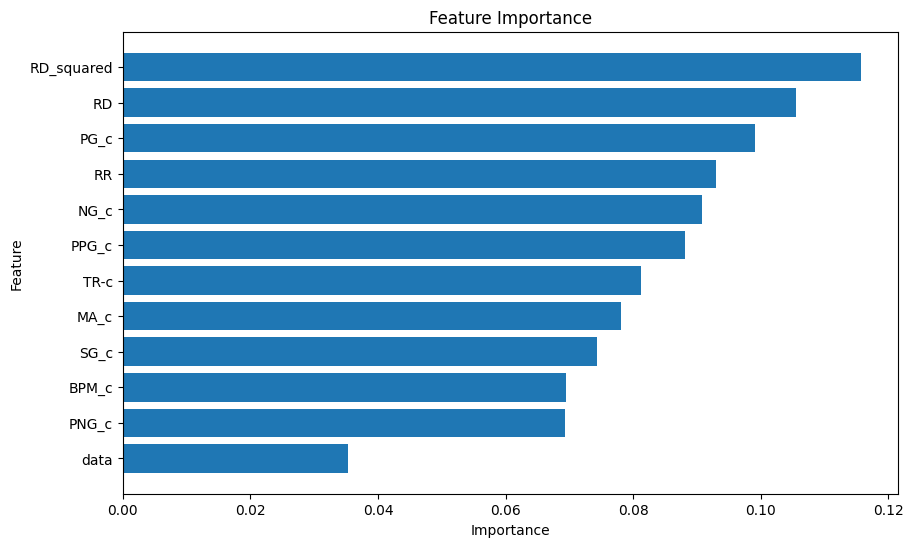

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# データを読み込む
data = pd.read_csv('test1019.csv')
data['RD_squared'] = data['RD'] ** 2
# 特徴量とターゲット変数を分ける
X = data.drop(columns=['neck'])  # neck以外の全ての列を特徴量として使用
y = data['neck']  # neck列をターゲット変数として使用

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの作成
model = RandomForestClassifier(random_state=42)

# モデルの訓練
model.fit(X_train, y_train)

# 特徴量の重要度を取得
importances = model.feature_importances_

# 特徴量名とその重要度を合わせる
# この時、XがDataFrameでない場合を考慮して列名を取得
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f'Feature {i}' for i in range(X.shape[1])]

# 特徴量と重要度をDataFrameにまとめる
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 重要度でソート
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 重要度を表示
print(feature_importance_df)

# 特徴量の重要度を可視化
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 特徴量を上から順に表示するために反転
plt.show()


   Feature  Importance
4    PPG_c    0.153408
6     MA_c    0.125549
5    PNG_c    0.119965
0    BPM_c    0.092206
7     TR-c    0.090209
2     NG_c    0.086005
8       RR    0.081780
3     SG_c    0.080792
1     PG_c    0.078442
9       RD    0.072290
10    data    0.019354


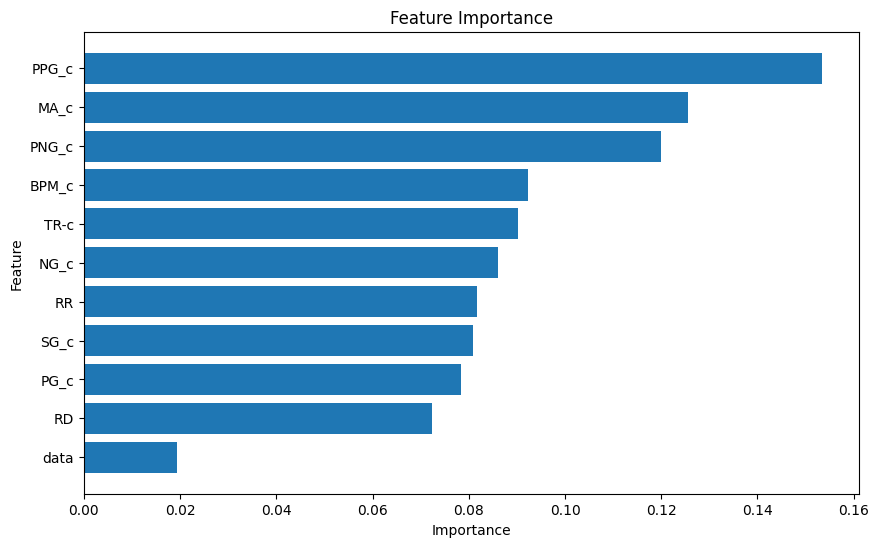

In [67]:
data = pd.read_csv('good.csv')

# 特徴量とターゲット変数を分ける
X = data.drop(columns=['neck'])  # neck以外の全ての列を特徴量として使用
y = data['neck']  # neck列をターゲット変数として使用

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの作成
model = RandomForestClassifier(random_state=42)

# モデルの訓練
model.fit(X_train, y_train)

# 特徴量の重要度を取得
importances = model.feature_importances_

# 特徴量名とその重要度を合わせる
# この時、XがDataFrameでない場合を考慮して列名を取得
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f'Feature {i}' for i in range(X.shape[1])]

# 特徴量と重要度をDataFrameにまとめる
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 重要度でソート
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 重要度を表示
print(feature_importance_df)

# 特徴量の重要度を可視化
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 特徴量を上から順に表示するために反転
plt.show()


<Axes: >

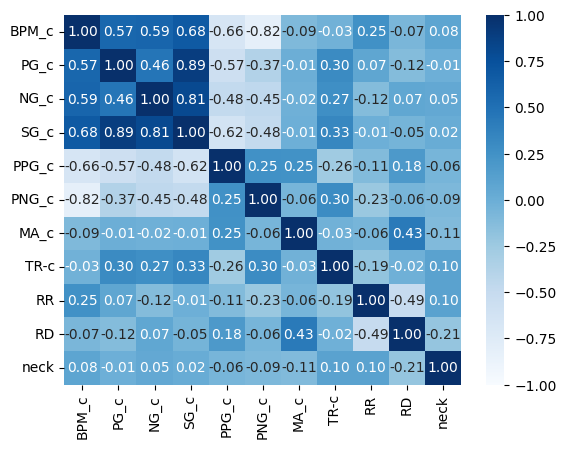

In [15]:

import seaborn as sns
df = pd.read_csv('test1019.csv')
cor = df[["BPM_c","PG_c","NG_c","SG_c","PPG_c","PNG_c","MA_c","TR-c","RR","RD","neck"]].corr()
sns.heatmap(cor, cmap="Blues", annot=True,fmt='.2f', vmin = -1, vmax = 1)


全部　0.6くらい

In [16]:
import numpy as np
import pandas as pd
data = pd.read_csv('alldata.csv')

# 特徴量とターゲット変数を分ける
X = data.drop(columns=['neck'])  # neck以外の全ての列を特徴量として使用
y = data['neck']  # neck列をターゲット変数として使用

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)
"""
特徴量の重要度を計算する
"""
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Elapsed time to compute the importances: 0.003 seconds
Elapsed time to compute the importances: 0.158 seconds


ValueError: Length of values (11) does not match length of index (12)

[Permutation feature Importance]


,importances_mean,importances_std
BPM_c,0.010811,0.008018
PG_c,0.012973,0.005512
NG_c,0.014595,0.010270
SG_c,0.005946,0.005643
PPG_c,0.143784,0.029428
PNG_c,0.024324,0.014147
MA_c,0.069730,0.014189
TR-c,0.009189,0.008391
RR,0.005405,0.004835
RD,0.008108,0.006509


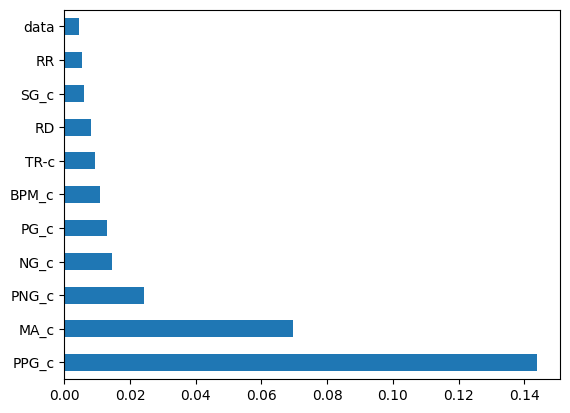

In [61]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, make_scorer

data = pd.read_csv('good.csv')
X = data.drop(columns=['neck'])
y = data['neck']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model (RandomForestClassifier in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



result = permutation_importance(model, X, y, scoring='neg_mean_absolute_error', n_repeats=10, n_jobs=-1, random_state=100)
perm_df = pd.DataFrame({"importances_mean":result["importances_mean"], "importances_std":result["importances_std"]}, index=X.columns)
print("[Permutation feature Importance]")
display(perm_df)
perm_df .sort_values("importances_mean", ascending=False).importances_mean.plot.barh()
plt.show()


In [13]:
import pandas as pd

# CSVファイルを読み込む
df = pd.read_csv('alldata.csv',encoding='shift_jis')

# 全ての行に0を持つ新しい列を追加
df['data'] = 0

# 結果を新しいCSVファイルに保存する
df.to_csv('0812.csv', index=False)


Randamforest Accuracy: 0.7142857142857143
Classification Report:


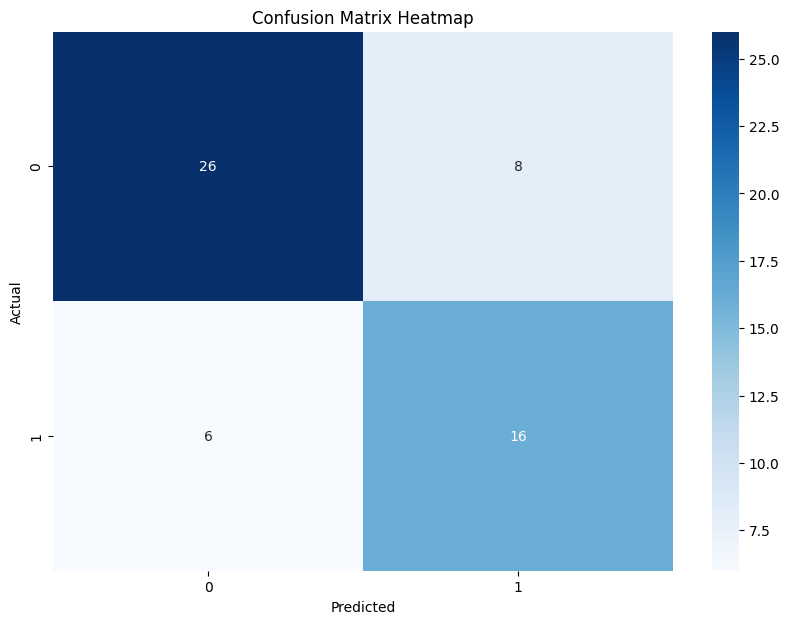

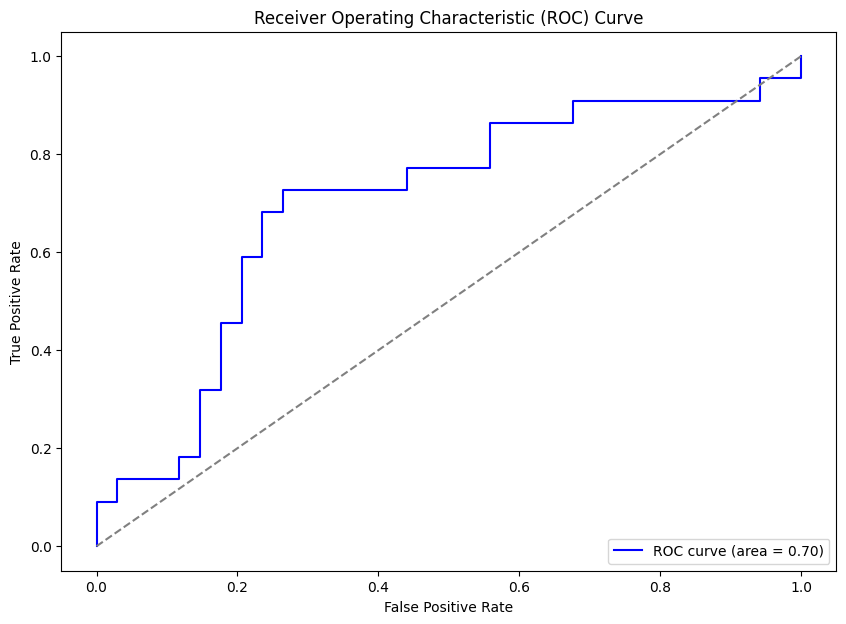

In [89]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

df = pd.read_csv('good.csv')
df = df.sample(frac = 1)
df = df.drop(columns=['BPM_c'])
train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
best1 = {
    'learning_rate': 0.04648098662718854,
    'max_depth': 14,
    'min_child_weight': 1,
    'colsample_bytree': 0.9249013014613967,
    'subsample': 0.6783166123284167,
    'reg_alpha': 0.0012463007475312104,
    'reg_lambda': 0.10493740214261414,
    'objective': 'multi:softprob',  # マルチクラス分類用のObjective
    'num_class': len(set(y_encoded))  # クラス数を指定
}

model = XGBClassifier(**best1,random_state=42)
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)



best2 = {'bootstrap': True, 'max_depth': 31, 'max_features': 0.40875674047408395, 'max_leaf_nodes': 260, 'n_estimators': 733, 'min_samples_split': 5, 'min_samples_leaf': 1}
clf = RandomForestClassifier(**best2, random_state=42)
clf.fit(X_train, y_train)
y_pred2 = clf.predict(X_test)
print(f"Randamforest Accuracy: {clf.score(X_test, y_test)}")


ensemble_model = VotingClassifier(estimators=[
    ('rf', clf), ('xgb', model)],
    voting='soft')
ensemble_model.fit(X_train, y_train)


y_pred3 = ensemble_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred3)

print("Classification Report:")


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


y_pred_proba = clf.predict_proba(X_test)[:, 1]  # 確率予測を取得
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


/Users/kajitsukasousei/Personal/Lab/analisys/analysisenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kajitsukasousei/Personal/Lab/analisys/analysisenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kajitsukasousei/Personal/Lab/analisys/analysisenv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

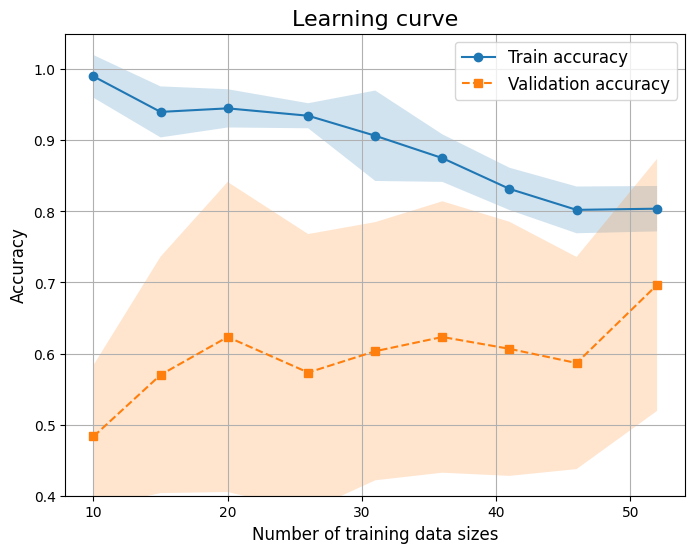

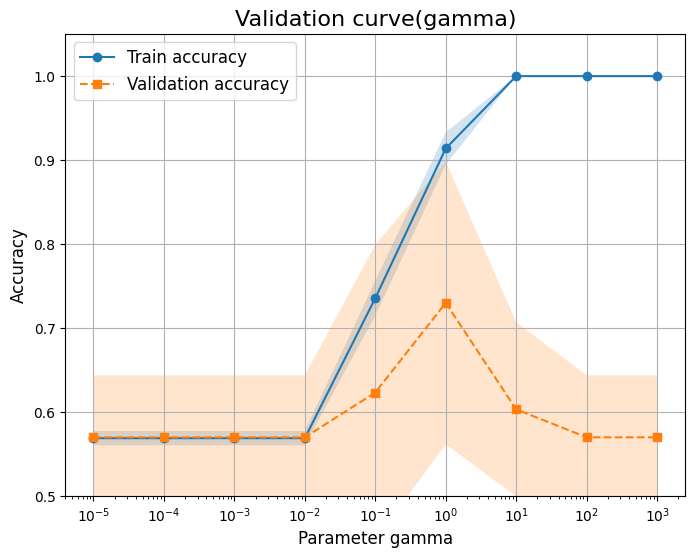

In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# CSVデータの読み込み
df = pd.read_csv('alldata.csv')

# データをシャッフル
df = df.sample(frac=1)

# 不要な列を削除して、データフレームを更新
df = df.drop(columns=['SG_c', 'PNG_c','PG_c','MA_c','TR-c','MA_c','BPM_c'])

# 特徴量とターゲット変数に分ける
train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ランダムフォレストモデルの作成

clf = RandomForestClassifier(random_state=42)
pipe = make_pipeline(StandardScaler(),
                     SVC()) # パラメータはデフォルト
# learning_curve関数で交差検証（k=10）
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe,
                                                        X = X_train, y = y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), # 与えたデータセットの何割を使用するかを指定
                                                        cv=10, n_jobs=1)
# 学習曲線の描画
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, marker='o', label='Train accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, marker='s', linestyle='--', label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.2)
plt.grid()
plt.title('Learning curve', fontsize=16)
plt.xlabel('Number of training data sizes', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.ylim([0.4, 1.05])
plt.show()


from sklearn.model_selection import validation_curve
# SVMのパラメータgammaを変化させる
param_range = [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e1,1e2,1e3]
# validation_curve関数で交差検証
train_scores, test_scores = validation_curve(estimator=pipe,
                                             X=X_train, y=y_train,
                                             param_name='svc__gamma',
                                             param_range=param_range, cv=10)

# 検証曲線の描画
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(figsize=(8,6))
plt.plot(param_range, train_mean, marker='o', label='Train accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2)
plt.plot(param_range, test_mean, marker='s', linestyle='--', label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2)
plt.grid()
plt.xscale('log')
plt.title('Validation curve(gamma)', fontsize=16)
plt.xlabel('Parameter gamma', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.ylim([0.5, 1.05])
plt.show()

In [90]:
import random

df = pd.read_csv('good.csv')
df = df.sample(frac = 1)

print(df)
train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values

i = 0
num1 = 0
num2 = 0
num3 = 0
while i < 100:
    i = i + 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(0,100000))
    from sklearn.linear_model import LogisticRegression

 

    clf = RandomForestClassifier(**best, random_state=42)
    model = XGBClassifier(random_state=42)

    clf.fit(X_train, y_train)
    num1 = clf.score(X_test, y_test) + num1


    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy1 = accuracy_score(y_test, y_pred)
    num2 = accuracy1 + num2

    
    ensemble_model = VotingClassifier(estimators=[
    ('rf', clf), ('xgb', model)],
    voting='soft')

    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_test)
    accuracy2 = accuracy_score(y_test, y_pred)
    num3 = accuracy2 + num3
    



randamave = num1 / 100
LGBave = num2 / 100
ave = num3 / 100
print("score1=", randamave)
print("score2=", LGBave)
print("score3=", ave)


          BPM_c       PG_c       NG_c       SG_c     PPG_c     PNG_c  \
85    73.687171   2.545092   3.587589   6.132681  0.446012  0.368241   
182  168.866433  28.810365  37.269731  66.080096  0.147671  0.207639   
162  100.485134  17.291807  11.459739  28.751546  0.233079  0.364024   
102  132.954376  10.408077  28.699779  39.107856  0.210005  0.241278   
110   92.557193  36.614622  24.744612  61.359234  0.197551  0.450697   
..          ...        ...        ...        ...       ...       ...   
116  141.746877  28.414895  23.836916  52.251811  0.189860  0.233430   
61   103.951545   7.223067  15.803188  23.026255  0.224672  0.352520   
9    119.022587   9.935396   9.072975  19.008371  0.213636  0.290470   
40   102.723591   7.954005   9.073146  17.027152  0.273860  0.310232   
128  109.335489  13.956149  20.484340  34.440488  0.242371  0.306399   

         MA_c      TR-c         RR        RD  neck  data  
85   0.148777       NaN  26.104424  0.785833     1     0  
182  0.070398  0.

In [99]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import pandas as pd
import random
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# データの読み込みとシャッフル
df = pd.read_csv('good.csv')
df = df.sample(frac=1)

# 特徴量とラベルの分離
train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values



# 評価用変数
num1, num2, num3 = 0, 0, 0

# PCAによるドメイン適応の準備
scaler = StandardScaler()  # 特徴量のスケーリング
pca = PCA(n_components=5)  # 主成分分析で次元削減

# 100回のランダムな分割で評価
for i in range(100):
    # トレーニングとテストデータの分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(0, 100000))

   
    # スケーリング（標準化）
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 平均値で欠損値を補完
    imputer = SimpleImputer(strategy='mean')
    X_train_scaled = imputer.fit_transform(X_train_scaled)
    X_test_scaled = imputer.transform(X_test_scaled)

    # PCAを適用
    pca = PCA(n_components=5)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # ランダムフォレスト
    clf = RandomForestClassifier(**random_forest_params)
    clf.fit(X_train_pca, y_train)
    num1 += clf.score(X_test_pca, y_test)

    # XGBoost
    model = XGBClassifier(**xgb_params)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    num2 += accuracy_score(y_test, y_pred)

    # アンサンブルモデル (VotingClassifier)
    ensemble_model = VotingClassifier(estimators=[
        ('rf', clf), ('xgb', model)],
        voting='soft'
    )
    ensemble_model.fit(X_train_pca, y_train)
    y_pred_ensemble = ensemble_model.predict(X_test_pca)
    num3 += accuracy_score(y_test, y_pred_ensemble)

# 平均スコアの計算
randamave = num1 / 100
LGBave = num2 / 100
ave = num3 / 100

# 結果の出力
print("Random Forest Average Score =", randamave)
print("XGBoost Average Score =", LGBave)
print("Ensemble Average Score =", ave)



Random Forest Average Score = 0.6217857142857143
XGBoost Average Score = 0.6166071428571427
Ensemble Average Score = 0.6228571428571428


In [92]:
import random
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('0and90upgrade.csv')
df = df.sample(frac = 1)


print(df)
train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values
y_encoded = label_encoder.fit_transform(y)

i = 0
num1 = 0
num2 = 0
num3 = 0
while i < 100:
    i = i + 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(0,100000))
    
    clf = RandomForestClassifier(random_state=42)
    model = XGBClassifier(**best1,random_state=42)

   
    ensemble_model = VotingClassifier(estimators=[
    ('rf', clf), ('xgb', model)],
    voting='soft')

    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_test)
    accuracy2 = accuracy_score(y_test, y_pred)
    num3 = accuracy2 + num3
    


ave = num3 / 100

print("score3=", ave)

         BPM_c       PG_c       NG_c       SG_c     PPG_c     PNG_c      MA_c  \
73  112.935012  13.964038  13.970258  27.934297  0.239638  0.291641  0.210145   
67   95.218069   6.895835   4.478480  11.374315  0.249476  0.380656  0.115076   
84   89.998808   4.861759   4.244725   9.106484  0.277352  0.389323  0.173081   
43   61.023651   3.909801   2.096169   6.005970  0.299215  0.684010  0.114776   
62   89.225478   5.882651   4.407110  10.289761  0.305150  0.367304  0.243874   
..         ...        ...        ...        ...       ...       ...       ...   
94   84.589368   5.730621   3.517797   9.248418  0.327013  0.382296  0.182558   
19   84.122637   5.717839   3.534742   9.252581  0.320079  0.393165  0.229638   
50  112.261837   7.782437  23.285686  31.068123  0.225067  0.309397  0.128101   
48  128.210759  20.090605  30.486212  50.576816  0.190315  0.277664  0.077421   
41  109.335489  13.956149  20.484340  34.440488  0.242371  0.306399  0.085392   

        TR-c         RR    

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('alldata.csv')
df = df.sample(frac = 1)

df = df.drop(columns=['SG_c', 'PNG_c','PG_c','MA_c','TR-c','MA_c','BPM_c'])
print(df)

train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# モデルの訓練
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(report)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


NameError: name 'pd' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization
import xgboost as xgb
import pandas as pd

# データの前処理
df = pd.read_csv('alldata.csv')
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop(columns=['SG_c', 'PNG_c', 'PG_c', 'MA_c', 'TR-c', 'MA_c', 'BPM_c'])

train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values

# 特徴量の標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# XGBoostの評価関数
def xgb_evaluate(min_child_weight, subsample, colsample_bytree, max_depth):
    params = {
        'objective': 'binary:logistic',
        'n_estimators': 50000,
        'learning_rate': 0.01,
        'min_child_weight': int(min_child_weight),
        'max_depth': int(max_depth),
        'colsample_bytree': colsample_bytree,
        'subsample': subsample,
        'random_state': 42,
        'eval_metric': 'logloss'
    }
    
    cls = xgb.XGBClassifier(**params)
    
    # モデルの訓練
    cls.fit(X_train, y_train,
            eval_set=[(X_test, y_test)],
            early_stopping_rounds=50,  # early stopping を適用
            verbose=False)
    
    pred = cls.predict(X_test)
    score = accuracy_score(y_test, pred)
    return score

# BayesianOptimizationの設定
xgb_bo = BayesianOptimization(
    f=xgb_evaluate, 
    pbounds={'min_child_weight': (1, 20),
             'subsample': (0.1, 1),
             'colsample_bytree': (0.1, 1),
             'max_depth': (1, 50)},
    random_state=42
)

# 最適化の実行
xgb_bo.maximize(init_points=15, n_iter=50)

# 結果の表示
print(xgb_bo.max)

# # XGBClassifierの初期化


# model = XGBClassifier(random_state=42)

# # 5分割交差検証を用いたグリッドサーチ
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=5)
# grid_search.fit(X_train, y_train)

# # 最適なモデルの取得
# best_model = grid_search.best_estimator_

# # テストセットで予測を実行
# y_pred = best_model.predict(X_test)

# # 評価
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

# # 結果を表示
# print(f"精度: {accuracy:.2f}")
# print(f"最適なパラメータ: {grid_search.best_params_}")
# print("分類レポート:\n", classification_rep)

# # 混同行列のヒートマップ
# plt.figure(figsize=(10, 7))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('予測されたラベル')
# plt.ylabel('実際のラベル')
# plt.title('混同行列のヒートマップ')
# plt.show()

|   iter    |  target   | colsam... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
import optuna
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# データセットの読み込み
df = pd.read_csv('alldata.csv')
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop(columns=['SG_c', 'PNG_c', 'PG_c', 'MA_c', 'TR-c', 'MA_c', 'BPM_c'])

train_data = df.drop("neck", axis=1)
y = df["neck"].values

# ターゲットラベルを整数にエンコード
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X = train_data.values
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# 目的関数の定義
def objective(trial):
    param = {
        'objective': 'multi:softprob',  # マルチクラス分類
        'num_class': len(set(y_encoded)),  # ターゲットのクラス数
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
    }

    # モデルの学習
    model = XGBClassifier(**param, random_state=42)
    model.fit(X_train, y_train)
    
    # 予測 (確率として出力される)
    y_pred_prob = model.predict_proba(X_test)
    
    # 確率をクラスラベルに変換
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # 精度を計算
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Optuna のスタディを作成
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 最良のパラメータと精度を取得
best_params = study.best_params
best_accuracy = study.best_value
print("Best Params:", best_params)
print("Best Accuracy:", best_accuracy)


[I 2024-09-05 11:56:35,915] A new study created in memory with name: no-name-659f853f-96b9-4c25-96d6-a251fb9d7603
[I 2024-09-05 11:56:35,981] Trial 0 finished with value: 0.5769230769230769 and parameters: {'learning_rate': 0.0017799527601512104, 'max_depth': 2, 'min_child_weight': 19, 'colsample_bytree': 0.7106306146420434, 'subsample': 0.6148985761488919, 'reg_alpha': 0.8048930292589083, 'reg_lambda': 4.3446663868900135}. Best is trial 0 with value: 0.5769230769230769.
[I 2024-09-05 11:56:36,099] Trial 1 finished with value: 0.7307692307692307 and parameters: {'learning_rate': 0.06754465365325016, 'max_depth': 14, 'min_child_weight': 7, 'colsample_bytree': 0.8024656677942807, 'subsample': 0.8652540021056049, 'reg_alpha': 1.5581769297764272, 'reg_lambda': 0.13621459359641974}. Best is trial 1 with value: 0.7307692307692307.
[I 2024-09-05 11:56:36,147] Trial 2 finished with value: 0.5769230769230769 and parameters: {'learning_rate': 0.009241438402905512, 'max_depth': 9, 'min_child_weig

Best Params: {'learning_rate': 0.05806653235194282, 'max_depth': 11, 'min_child_weight': 2, 'colsample_bytree': 0.9623585733961902, 'subsample': 0.7243928885301003, 'reg_alpha': 0.17447522433110044, 'reg_lambda': 0.15759461377396405}
Best Accuracy: 0.8846153846153846


In [ ]:
import optuna
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# データセットの読み込み
df = pd.read_csv('alldata.csv')
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop(columns=['SG_c', 'PNG_c', 'PG_c', 'MA_c', 'TR-c', 'MA_c', 'BPM_c'])

train_data = df.drop("neck", axis=1)
y = df["neck"].values

# ターゲットラベルを整数にエンコード
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X = train_data.values
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# 目的関数の定義
def objective(trial):
    param = {
        'objective': 'multi:softprob',  # マルチクラス分類
        'num_class': len(set(y_encoded)),  # ターゲットのクラス数
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
    }

    # モデルの学習
    model = XGBClassifier(**param, random_state=42)
    model.fit(X_train, y_train)
    
    # 予測 (確率として出力される)
    y_pred_prob = model.predict_proba(X_test)
    
    # 確率をクラスラベルに変換
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    # 精度を計算
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

# Optuna のスタディを作成
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# 最良のパラメータと精度を取得
best_params = study.best_params
best_accuracy = study.best_value
print("Best Params:", best_params)
print("Best Accuracy:", best_accuracy)

[I 2024-09-05 12:36:32,702] A new study created in memory with name: no-name-908a6b25-d60f-42c7-b489-d45ca94d83a8
[I 2024-09-05 12:36:32,755] Trial 0 finished with value: 0.6538461538461539 and parameters: {'learning_rate': 0.0890252616395049, 'max_depth': 14, 'min_child_weight': 9, 'colsample_bytree': 0.8342988769701678, 'subsample': 0.7215713753389158, 'reg_alpha': 8.530778646839673, 'reg_lambda': 0.10920894056409229}. Best is trial 0 with value: 0.6538461538461539.
[I 2024-09-05 12:36:32,803] Trial 1 finished with value: 0.6538461538461539 and parameters: {'learning_rate': 0.04173771877846726, 'max_depth': 13, 'min_child_weight': 20, 'colsample_bytree': 0.671477452314092, 'subsample': 0.623868767199537, 'reg_alpha': 0.5913621731597485, 'reg_lambda': 0.0018115154967568144}. Best is trial 0 with value: 0.6538461538461539.
[I 2024-09-05 12:36:32,899] Trial 2 finished with value: 0.5 and parameters: {'learning_rate': 0.00419297732952045, 'max_depth': 4, 'min_child_weight': 7, 'colsample

Best Params: {'learning_rate': 0.0890252616395049, 'max_depth': 14, 'min_child_weight': 9, 'colsample_bytree': 0.8342988769701678, 'subsample': 0.7215713753389158, 'reg_alpha': 8.530778646839673, 'reg_lambda': 0.10920894056409229}
Best Accuracy: 0.6538461538461539


In [10]:
import optuna
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import fbeta_score

# データセットの読み込み
df = pd.read_csv('alldata.csv')
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop(columns=['SG_c', 'PNG_c', 'PG_c', 'MA_c', 'TR-c', 'MA_c', 'BPM_c'])

train_data = df.drop("neck", axis=1)
y = df["neck"].values

# ターゲットラベルを整数にエンコード
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X = train_data.values
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



def objective(trial):


    bootstrap = trial.suggest_categorical('bootstrap',[True,False])
    
    max_depth = trial.suggest_int('max_depth', 1, 100)
#     max_features = trial.suggest_categorical('max_features', ['sqrt','log2',"None"])
    max_features = trial.suggest_float('max_features', 0,1.0)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1,1000)
    n_estimators =  trial.suggest_int('n_estimators', 1, 1000)
    min_samples_split = trial.suggest_int('min_samples_split',2,5)
    min_samples_leaf = trial.suggest_int('min_samples_leaf',1,10)
    
    
    model = RandomForestClassifier(bootstrap = bootstrap,
                                 max_depth = max_depth, 
                                 max_features = max_features,
                                 max_leaf_nodes = max_leaf_nodes,
                                 n_estimators = n_estimators,
                                 min_samples_split = min_samples_split,
                                 min_samples_leaf = min_samples_leaf,
                                 criterion="gini",random_state=0, n_jobs=-1)
    
    model.fit(X_train , y_train)
    # 推論
    y_pred = model.predict(X_test)

    # 評価
    #＝＝＝＝＝＝＝＝＝＝＝利用したい評価指標に変更＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
    score = fbeta_score(y_test, y_pred, average='binary', beta=0.5)

    return score

 
 
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=50)

print("=======ベストパラメータ========")
print(study.best_params)


i = 0
num1 = 0
num2 = 0
num3 = 0
while i < 10:
    i = i + 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(0,100000))
    best1 = {
    'learning_rate': 0.04648098662718854,
    'max_depth': 14,
    'min_child_weight': 1,
    'colsample_bytree': 0.9249013014613967,
    'subsample': 0.6783166123284167,
    'reg_alpha': 0.0012463007475312104,
    'reg_lambda': 0.10493740214261414,
    'objective': 'multi:softprob',  # マルチクラス分類用のObjective
    'num_class': len(set(y_encoded))  # クラス数を指定
    }
    best2 = study.best_params
    clf = RandomForestClassifier(random_state=42)
    model = XGBClassifier(**best1,random_state=42)

   
    ensemble_model = VotingClassifier(estimators=[
    ('rf', clf), ('xgb', model)],
    voting='soft')

    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_test)
    accuracy2 = accuracy_score(y_test, y_pred)
    num3 = accuracy2 + num3
    


ave = num3 / 10

print("score3=", ave)


[I 2024-09-06 16:37:12,671] A new study created in memory with name: no-name-703da755-408a-4d0b-9aca-0ee7ddf65b48
[I 2024-09-06 16:37:12,765] Trial 0 finished with value: 0.38461538461538464 and parameters: {'bootstrap': False, 'max_depth': 74, 'max_features': 0.5986584841970366, 'max_leaf_nodes': 157, 'n_estimators': 156, 'min_samples_split': 2, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.38461538461538464.
[I 2024-09-06 16:37:12,860] Trial 1 finished with value: 0.38461538461538464 and parameters: {'bootstrap': False, 'max_depth': 3, 'max_features': 0.9699098521619943, 'max_leaf_nodes': 833, 'n_estimators': 213, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.38461538461538464.
[I 2024-09-06 16:37:12,934] Trial 2 finished with value: 0.9090909090909091 and parameters: {'bootstrap': False, 'max_depth': 44, 'max_features': 0.2912291401980419, 'max_leaf_nodes': 612, 'n_estimators': 140, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial

=======ベストパラメータ========
{'bootstrap': False, 'max_depth': 6, 'max_features': 0.26222041003110086, 'max_leaf_nodes': 250, 'n_estimators': 88, 'min_samples_split': 3, 'min_samples_leaf': 2}


NameError: name 'random' is not defined

In [14]:
import random
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('testall20241116.csv')
df = df.sample(frac = 1)
df = df.drop(columns=['TR-c','PPG_c','PNG_c'])

print(df)
train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values
y_encoded = label_encoder.fit_transform(y)

i = 0
num1 = 0
num2 = 0
num3 = 0
while i < 100:
    i = i + 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(0,100000))
    best1 = {
    'learning_rate': 0.04648098662718854,
    'max_depth': 14,
    'min_child_weight': 1,
    'colsample_bytree': 0.9249013014613967,
    'subsample': 0.6783166123284167,
    'reg_alpha': 0.0012463007475312104,
    'reg_lambda': 0.10493740214261414,
    'objective': 'multi:softprob',  # マルチクラス分類用のObjective
    'num_class': len(set(y_encoded))  # クラス数を指定
    }
    best2 = {'bootstrap': True, 'max_depth': 31, 'max_features': 0.40875674047408395, 'max_leaf_nodes': 260, 'n_estimators': 733, 'min_samples_split': 5, 'min_samples_leaf': 1}
    clf = RandomForestClassifier(**best2, random_state=42)
    model = XGBClassifier(**best1,random_state=42)

   
    ensemble_model = VotingClassifier(estimators=[
    ('rf', clf), ('xgb', model)],
    voting='soft')

    ensemble_model.fit(X_train, y_train)
    y_pred = ensemble_model.predict(X_test)
    accuracy2 = accuracy_score(y_test, y_pred)
    num3 = accuracy2 + num3
    


ave = num3 / 100

print("score3=", ave)

          BPM_c       PG_c       NG_c       SG_c      MA_c         RR  \
60    98.978596   6.824339   5.228750  12.053089  0.162725  29.681370   
12   106.667425  11.646521  16.640956  28.287477  0.151787  19.879530   
100  112.498509  14.031042   8.865441  22.896483  0.106431  16.692949   
75   107.723879  12.090257  11.052290  23.142547  0.109473  12.516449   
137   96.631013  18.427164  11.713793  30.140957  0.039725  24.685486   
..          ...        ...        ...        ...       ...        ...   
139  129.014409   9.880803  28.619322  38.500124  0.159990  29.549678   
76   107.643037   9.124212  19.005924  28.130136  0.084930  12.000403   
142  102.736434   9.341258   7.484501  16.825759  0.157364  12.118500   
5     92.067608   6.252651   3.983989  10.236641  0.147286  19.854927   
146  116.003898  28.319711   6.680199  34.999910  0.150970  17.007743   

           RD  neck  
60   0.982864     1  
12   1.791102     0  
100  2.993848     0  
75   2.668315     0  
137  0.912562

NameError: name 'label_encoder' is not defined

{'bootstrap': True, 'max_depth': 31, 'max_features': 0.007547319316293155, 'max_leaf_nodes': 571, 'n_estimators': 427, 'min_samples_split': 4, 'min_samples_leaf': 7}
70ぱー


{'bootstrap': False, 'max_depth': 44, 'max_features': 0.2912291401980419, 'max_leaf_nodes': 612, 'n_estimators': 140, 'min_samples_split': 3, 'min_samples_leaf': 4}

{'bootstrap': True, 'max_depth': 63, 'max_features': 0.40284611103379003, 'max_leaf_nodes': 843, 'n_estimators': 976, 'min_samples_split': 3, 'min_samples_leaf': 1}



{'bootstrap': True, 'max_depth': 31, 'max_features': 0.40875674047408395, 'max_leaf_nodes': 260, 'n_estimators': 733, 'min_samples_split': 5, 'min_samples_leaf': 1}
これだ！

{'bootstrap': False, 'max_depth': 27, 'max_features': 0.8959560857538565, 'max_leaf_nodes': 249, 'n_estimators': 445, 'min_samples_split': 2, 'min_samples_leaf': 4}
score3= 0.6923076923076923

In [17]:
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
df = pd.read_csv('20241116.csv')
df = df.drop(columns=['SG_c'])
df = df.sample(frac = 1)
print(df)
train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values

i = 0
num1 = 0
num2 = 0
num3 = 0
while i < 100:
    i = i + 1
    best = {'bootstrap': True, 'max_depth': 53, 'max_features': 0.19944316247324578, 'max_leaf_nodes': 421, 'n_estimators': 459, 'min_samples_split': 4, 'min_samples_leaf': 9}
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(0,100000))
    clf = RandomForestClassifier(**best, random_state=42)
    clf.fit(X_train, y_train)
    num1 = clf.score(X_test, y_test) + num1
    


ave = num1 / 10

print("score3=", ave)


         BPM_c       PG_c       NG_c     PPG_c     PNG_c      MA_c      TR-c  \
18  122.288943  13.347686  14.968218  0.244736  0.245905  0.111557  0.253073   
57  107.429335  12.352739  14.862557  0.237646  0.320861  0.126671  0.256938   
37  109.097455  11.183096  10.885870  0.233937  0.316030  0.102403  0.199155   
11   89.499474   5.332268   5.377909  0.325068  0.345327  0.259352  0.147730   
3   123.465364  28.593842   6.579619  0.243100  0.242866  0.131944  0.326003   
..         ...        ...        ...       ...       ...       ...       ...   
10  119.388136  10.056413   9.188134  0.211778  0.290785  0.092595  0.178585   
22  107.273693   6.906510  16.237945  0.281061  0.278256  0.112855  0.224867   
38   99.468083   6.842463   6.954240  0.323510  0.279699  0.117681  0.174066   
54   91.374667   6.725994   3.910607  0.227339  0.429299  0.144066  0.062645   
62  103.293558  18.474270  11.799461  0.242282  0.338587  0.095700  0.468836   

           RR        RD  neck  
18  21.

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# データセットの読み込み
df = pd.read_csv('alldata.csv')
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop(columns=['SG_c', 'PNG_c', 'PG_c', 'MA_c', 'TR-c', 'MA_c', 'BPM_c'])

train_data = df.drop("neck", axis=1)
y = df["neck"].values

# ターゲットラベルを整数にエンコード
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X = train_data.values
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Optunaで得られた最適なパラメータを使用


i = 0
num1 = 0
num2 = 0
num3 = 0
while i < 1000:
    i = i + 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random.randint(0,100000))
    best_params = {
    'learning_rate': 0.04648098662718854,
    'max_depth': 14,
    'min_child_weight': 1,
    'colsample_bytree': 0.9249013014613967,
    'subsample': 0.6783166123284167,
    'reg_alpha': 0.0012463007475312104,
    'reg_lambda': 0.10493740214261414,
    'objective': 'multi:softprob',  # マルチクラス分類用のObjective
    'num_class': len(set(y_encoded))  # クラス数を指定
}
    model = XGBClassifier(**best_params, random_state=42)
    model.fit(X_train, y_train)

    y_pred_prob = model.predict_proba(X_test)

    # クラスラベルに変換
    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy2 = accuracy_score(y_test, y_pred)
    num3 = accuracy2 + num3
    


ave = num3 / 10

print("score3=", ave)


score3= 69.94230769230788


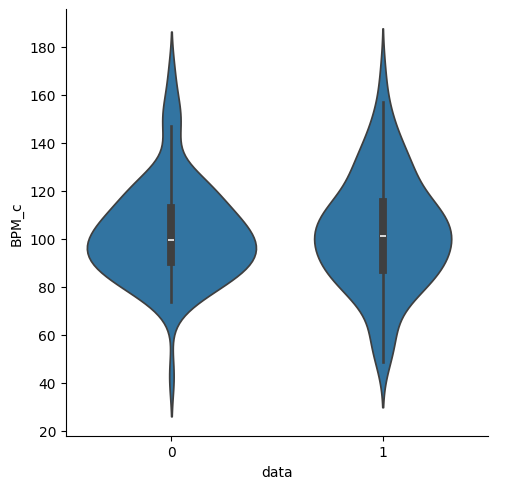

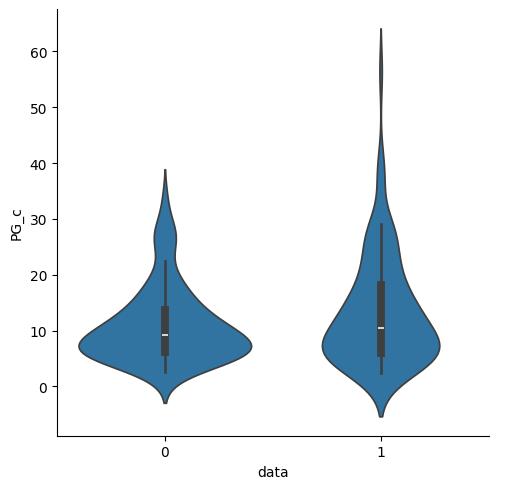

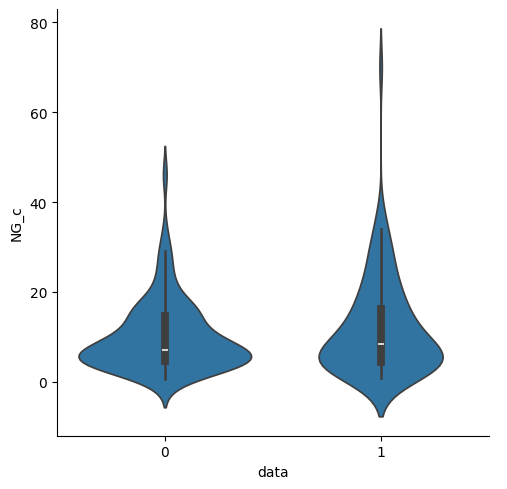

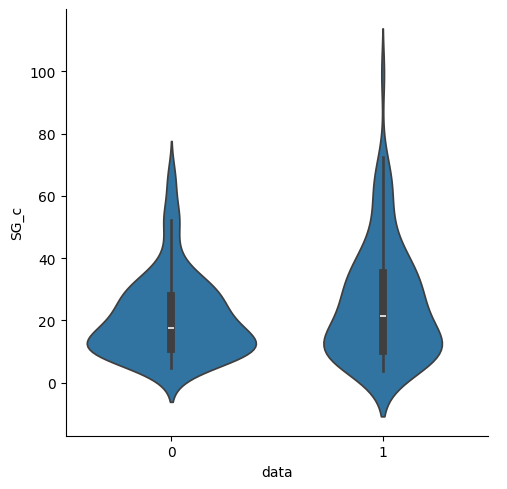

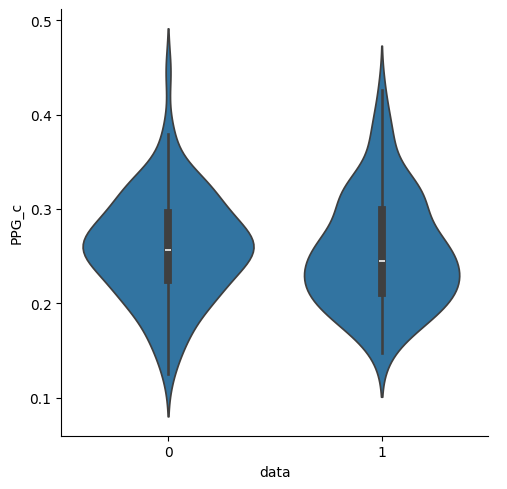

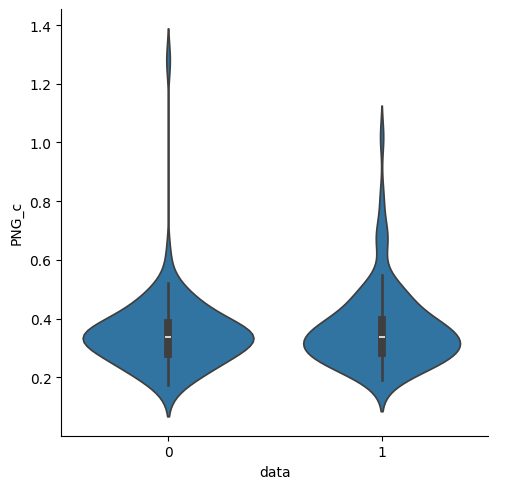

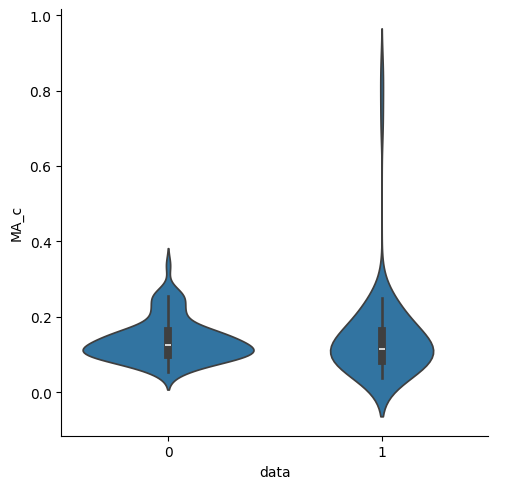

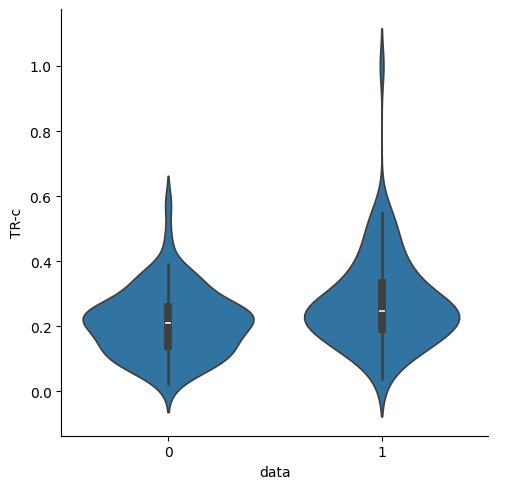

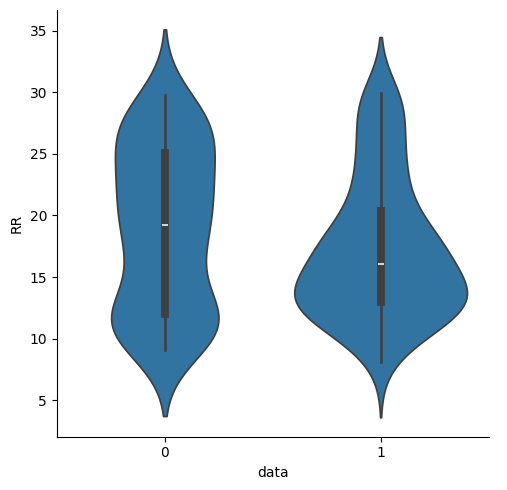

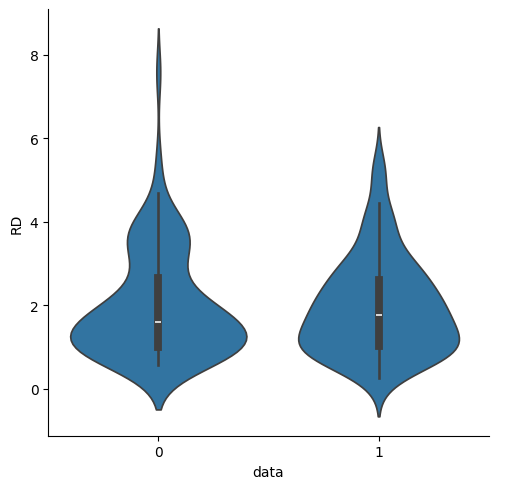

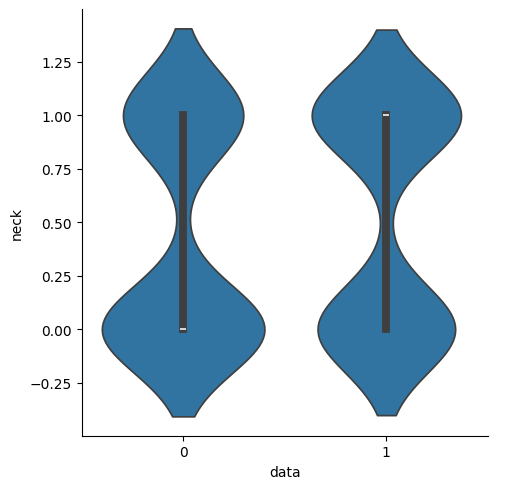

In [64]:
df = pd.read_csv('good.csv')
for col in ["BPM_c","PG_c","NG_c","SG_c","PPG_c","PNG_c","MA_c","TR-c","RR","RD","neck"]:
    sns.catplot(x="data", y=col, data=df, kind='violin')

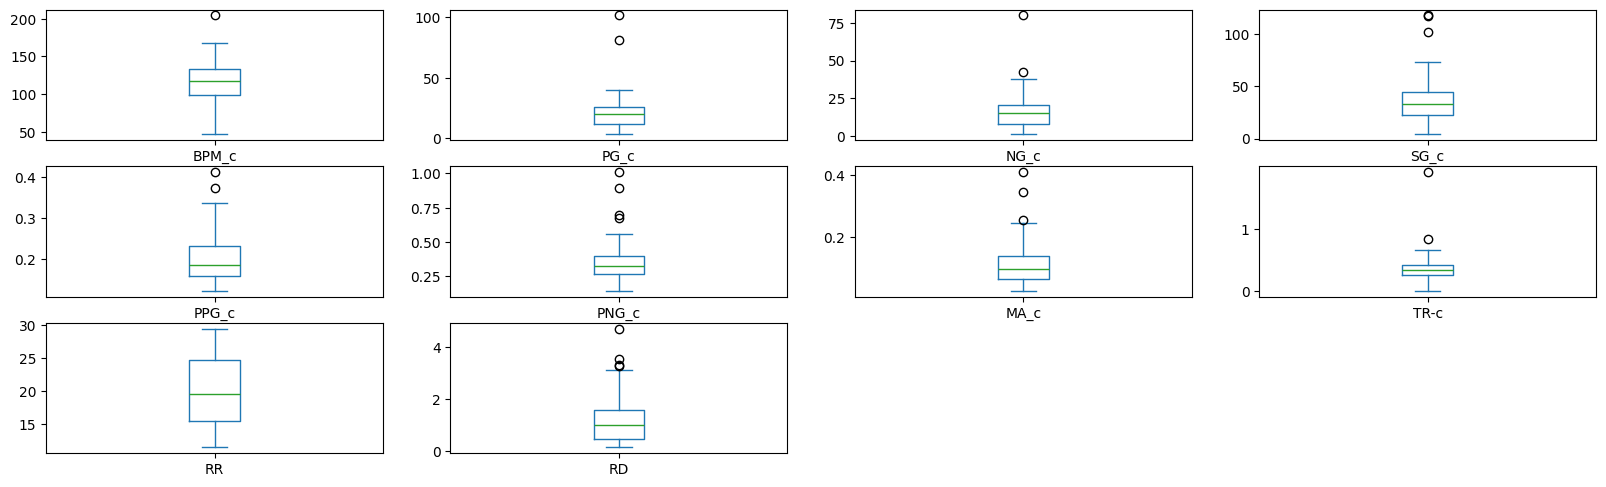

In [ ]:
#[IN]:
 
df = pd.read_csv('alldata.csv')
#箱ひげ図を表示するための関数を定義
def get_box(input_df):
  #入力のコピーを作成
  output_df=input_df.copy()
  #表示する図のサイズを指定
  fig = plt.figure(figsize=(20,20))
  #箱ひげ図で表示するデータの列を指定
  num_list=["BPM_c","PG_c","NG_c","SG_c","PPG_c","PNG_c","MA_c","TR-c","RR","RD"]
  #指定した列分繰り返す
  for i in range(len(num_list)):
    #1出力に複数の図を表示できるように設定
    plt.subplot(len(num_list), 4, i+1)
    #箱ひげ図の表示
    output_df[num_list[i]].plot(kind="box")
  return output_df



df=get_box(df)

In [ ]:

#[IN]:
 
#四分位数と外れ値のindex値を取得する関数を定義
def box_Outlier(input_df):
  #入力のコピーを作成
  output_df=input_df.copy()
  #詳細を表示するデータの列を指定
  num_list= ["BPM_c","PG_c","NG_c","SG_c","PPG_c","PNG_c","MA_c","TR-c","RR","RD"]
  #指定した列分繰り返す
  for i in range(len(num_list)):
    #第1四分位数を取得
    q1=output_df[num_list[i]].quantile(0.25)
    #第2四分位数を取得
    q3=output_df[num_list[i]].quantile(0.75)
    #IQRを取得
    iqr=q3-q1
    #外れ値基準の下限を取得
    bottom=q1-(1.5*iqr)
    #外れ値基準の上限を取得
    up=q3+(1.5*iqr)
    #列名、Q1、Q3、IQR、外れ値を表示
    print(str(num_list[i]))
    print("Q1は："+str(q1))
    print("Q3は："+str(q3))
    print("IQRは："+str(iqr))
    print("外れ値は↓")
    print(output_df[num_list[i]][(output_df[num_list[i]] < bottom) | (output_df[num_list[i]] > up) ])
    print("*********************")
  return output_df


df=box_Outlier(df)

BPM_c
Q1は：98.11424732750001
Q3は：133.143507475
IQRは：35.0292601475
外れ値は↓
67    204.318788
Name: BPM_c, dtype: float64
*********************
PG_c
Q1は：11.834391697500001
Q3は：25.45692237
IQRは：13.6225306725
外れ値は↓
64     81.332365
81    101.372237
Name: PG_c, dtype: float64
*********************
NG_c
Q1は：8.062590065750001
Q3は：20.197431635
IQRは：12.13484156925
外れ値は↓
55    42.046875
57    80.006130
Name: NG_c, dtype: float64
*********************
SG_c
Q1は：22.496797987500003
Q3は：44.922776230000004
IQRは：22.4259782425
外れ値は↓
57    117.160854
64    101.969196
81    117.671758
Name: SG_c, dtype: float64
*********************
PPG_c
Q1は：0.159118125
Q3は：0.23207375025
IQRは：0.07295562524999999
外れ値は↓
11    0.412450
28    0.373465
Name: PPG_c, dtype: float64
*********************
PNG_c
Q1は：0.26894000025
Q3は：0.40058500025
IQRは：0.131645
外れ値は↓
9     0.677247
20    0.896090
21    1.009090
79    0.694573
Name: PNG_c, dtype: float64
*********************
MA_c
Q1は：0.06318662975
Q3は：0.13930181074999998
IQRは：0.076115

BPM_c
Q1は：102.6366207
Q3は：137.954996
IQRは：35.3183753
外れ値は↓
67    204.318788
Name: BPM_c, dtype: float64
*********************
PG_c
Q1は：10.52005376
Q3は：25.49665118
IQRは：14.976597420000001
外れ値は↓
64     81.332365
81    101.372237
Name: PG_c, dtype: float64
*********************
NG_c
Q1は：7.924942799
Q3は：21.08729347
IQRは：13.162350670999999
外れ値は↓
55    42.046875
57    80.006130
Name: NG_c, dtype: float64
*********************
SG_c
Q1は：20.66321287
Q3は：47.12628362
IQRは：26.463070750000004
外れ値は↓
57    117.160854
64    101.969196
81    117.671758
Name: SG_c, dtype: float64
*********************
PPG_c
Q1は：0.163285
Q3は：0.221103333
IQRは：0.057818333
外れ値は↓
66    0.337117
Name: PPG_c, dtype: float64
*********************
PNG_c
Q1は：0.255832
Q3は：0.372523333
IQRは：0.11669133300000001
外れ値は↓
79    0.694573
Name: PNG_c, dtype: float64
*********************
MA_c
Q1は：0.073525603
Q3は：0.153053497
IQRは：0.07952789400000002
外れ値は↓
65    0.409655
Name: MA_c, dtype: float64
*********************
TR-c
Q1は：0.234588
Q3は：0

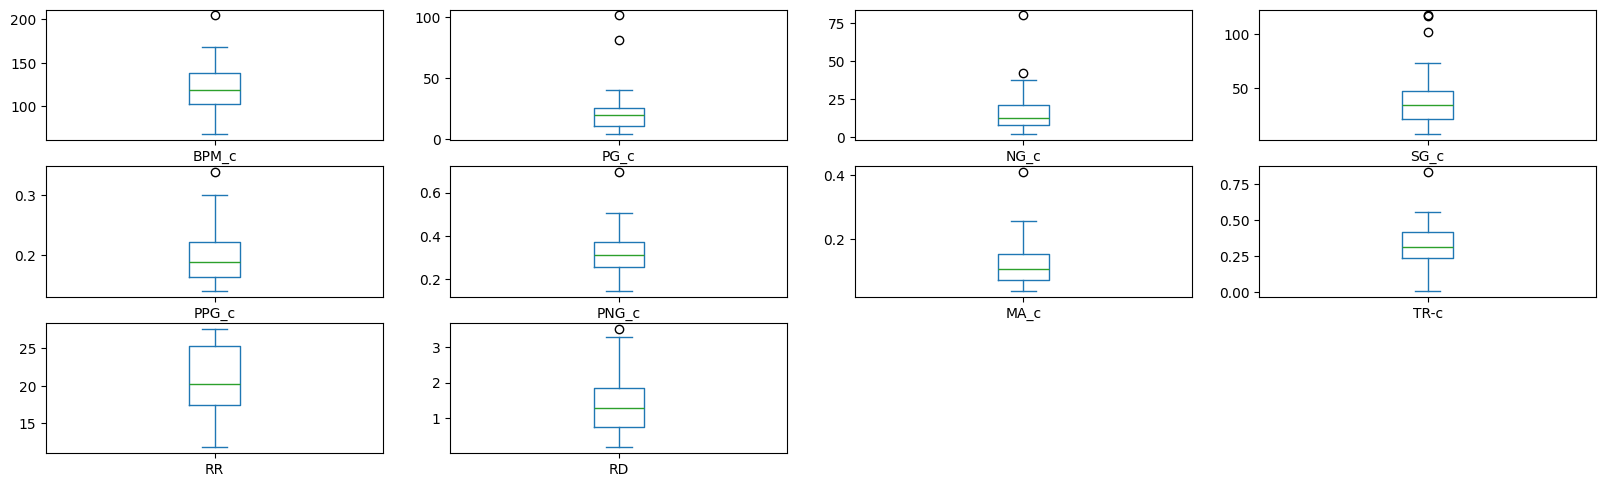

In [ ]:
df_NHP=df.groupby('neck').get_group(0)

#setosaのデータに対する箱ひげ図を表示
df_NHP=get_box(df_NHP)

df_NHP=box_Outlier(df_NHP)

BPM_c
Q1は：89.519823105
Q3は：128.0456182
IQRは：38.52579509500001
外れ値は↓
Series([], Name: BPM_c, dtype: float64)
*********************
PG_c
Q1は：12.859441485000001
Q3は：24.94431961
IQRは：12.084878125
外れ値は↓
Series([], Name: PG_c, dtype: float64)
*********************
NG_c
Q1は：10.565182705
Q3は：18.46383574
IQRは：7.898653035000001
外れ値は↓
15    32.943788
Name: NG_c, dtype: float64
*********************
SG_c
Q1は：23.868193034999997
Q3は：43.247304584999995
IQRは：19.379111549999998
外れ値は↓
Series([], Name: SG_c, dtype: float64)
*********************
PPG_c
Q1は：0.1573995835
Q3は：0.23682916650000002
IQRは：0.07942958300000003
外れ値は↓
11    0.412450
28    0.373465
Name: PPG_c, dtype: float64
*********************
PNG_c
Q1は：0.2840066665
Q3は：0.44846874999999997
IQRは：0.16446208349999997
外れ値は↓
20    0.89609
21    1.00909
Name: PNG_c, dtype: float64
*********************
MA_c
Q1は：0.0590575115
Q3は：0.11129140800000001
IQRは：0.05223389650000001
外れ値は↓
11    0.343868
13    0.222830
Name: MA_c, dtype: float64
*******************

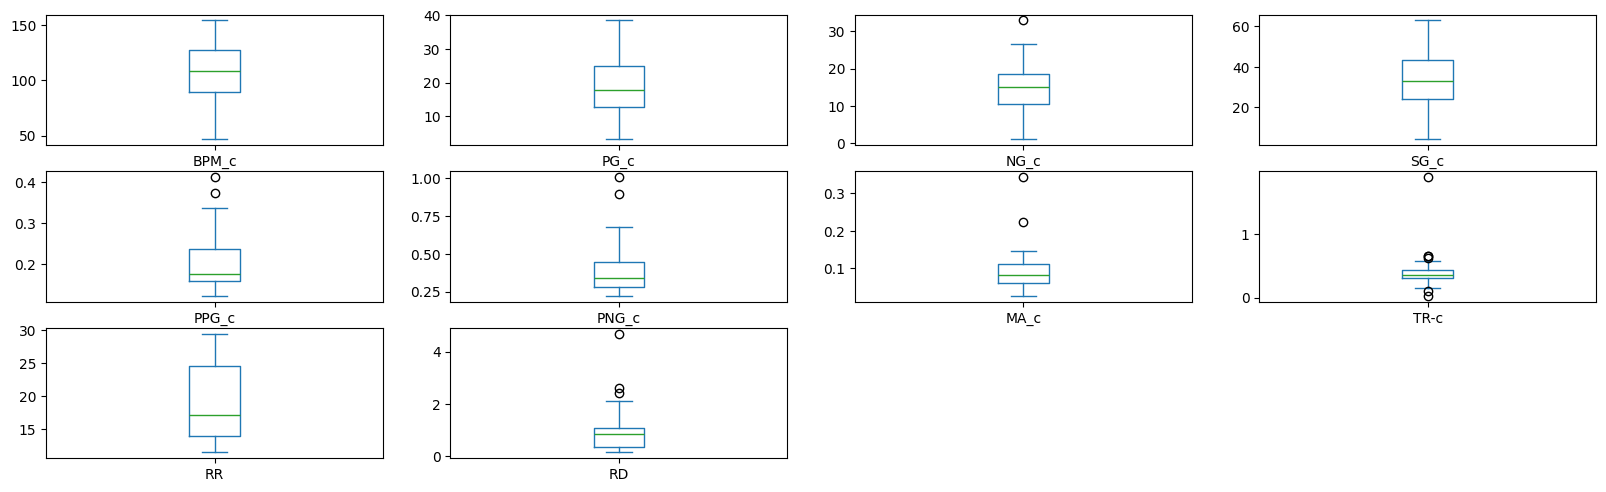

In [ ]:
df_FHP=df.groupby('neck').get_group(1)
df_FHP=get_box(df_FHP)

df_FHP=box_Outlier(df_FHP)

In [ ]:
df = pd.read_csv('Calldata.csv')
df = df.sample(frac = 1)
print(df.drop(columns=['SG_c', 'PNG_c','PG_c','MA_c']))
df = df.drop(columns=['SG_c', 'PNG_c','PG_c','MA_c','MA_c','MA_c'])
train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1121212213)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))

         BPM_c       NG_c     PPG_c      TR-c         RR        RD  neck
46   95.270356   3.726605  0.257263  0.126560  26.028110  0.983464     0
65  108.141232  11.887935  0.258318  0.288150  18.782223  3.109166     0
7   129.229924  16.485896  0.178681  0.358533  13.863537  0.903387     1
23  133.679117  23.242719  0.226000  0.428835  18.922789  1.018483     1
76  117.472003   8.691825  0.143510  0.236923  19.864327  0.255043     0
..         ...        ...       ...       ...        ...       ...   ...
1   100.849658  11.152153  0.159330  0.545790  27.049081  1.177798     1
43  137.202442  16.498348  0.182156  0.245210  22.662119  0.709511     0
6   154.465004  20.066182  0.160178  0.332597  26.156328  0.365747     1
18   99.947944  13.369767  0.153680  0.336363  20.757367  0.165592     1
10  118.520860  14.920694  0.232215  0.350461  13.921695  1.127332     1

[84 rows x 7 columns]
score= 0.7692307692307693


In [ ]:
df = pd.read_csv('Calldata.csv')
df = df.sample(frac = 1)

train_data = df.drop("neck", axis=1)
y = df["neck"].values
X = train_data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

print("score=", clf.score(X_test, y_test))

score= 0.6538461538461539


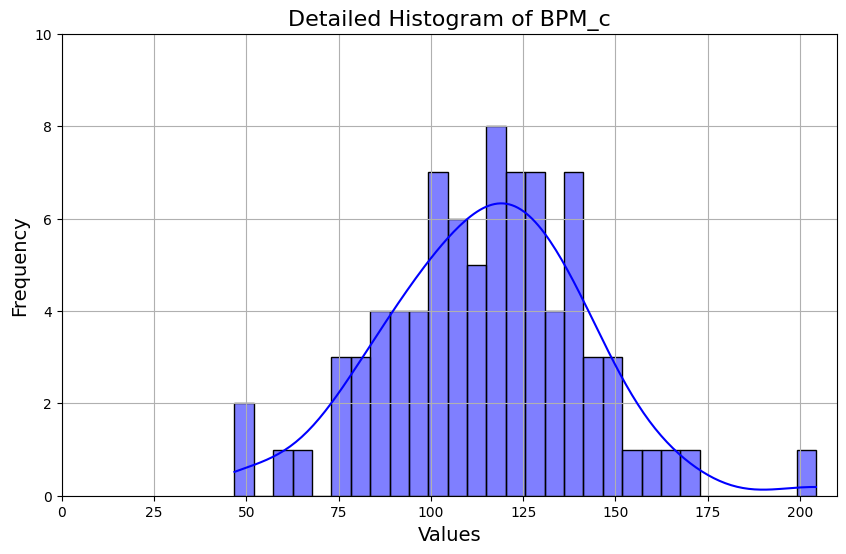

In [ ]:
df = pd.read_csv('alldata.csv')
# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['BPM_c'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(0, 210)  # X軸の範囲
plt.ylim(0, 10)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of BPM_c', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()

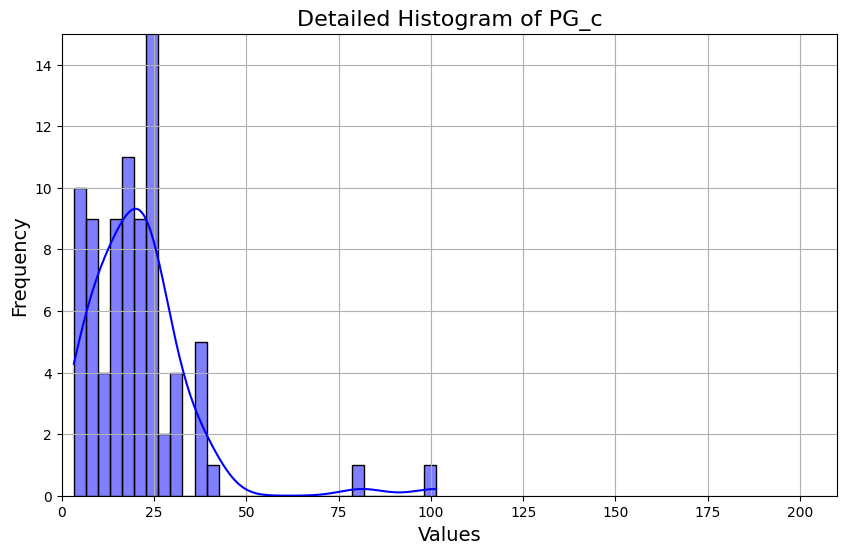

In [ ]:
# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['PG_c'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(0, 210)  # X軸の範囲
plt.ylim(0, 15)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of PG_c', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()








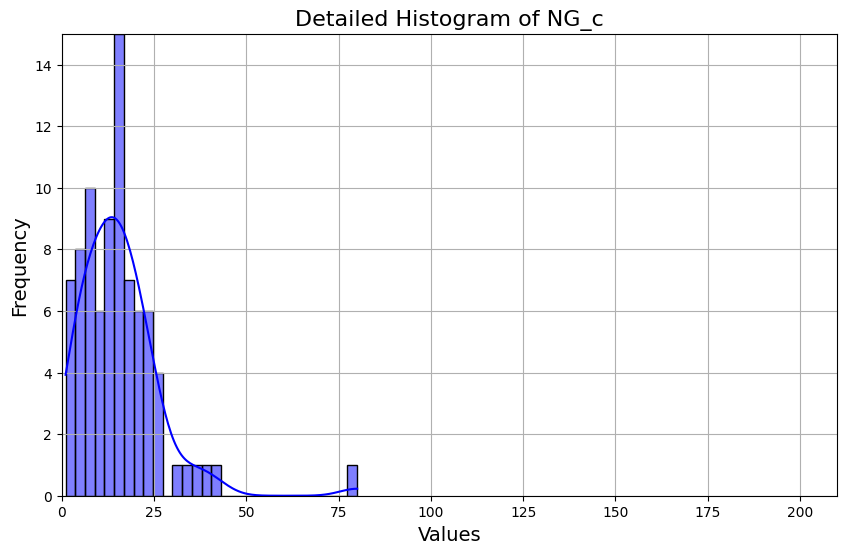

In [ ]:
# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['NG_c'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(0, 210)  # X軸の範囲
plt.ylim(0, 15)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of NG_c', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()

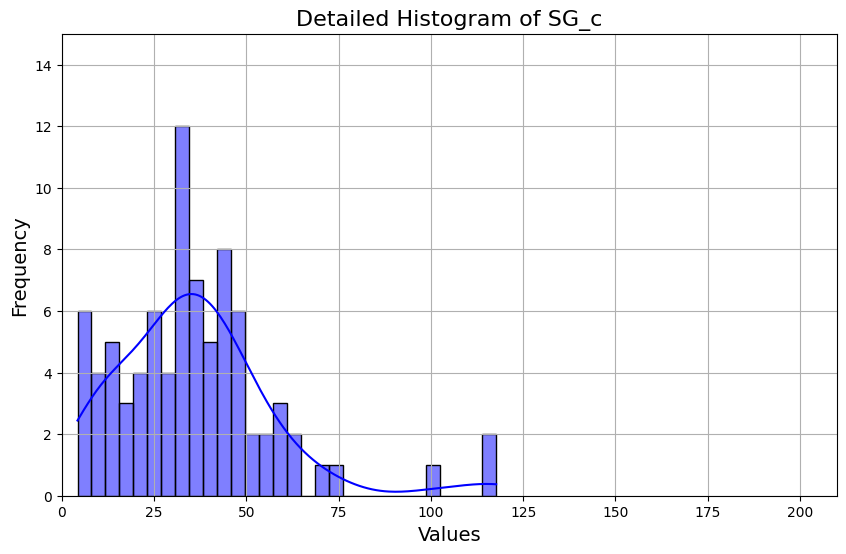

In [ ]:

# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['SG_c'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(0, 210)  # X軸の範囲
plt.ylim(0, 15)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of SG_c', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()

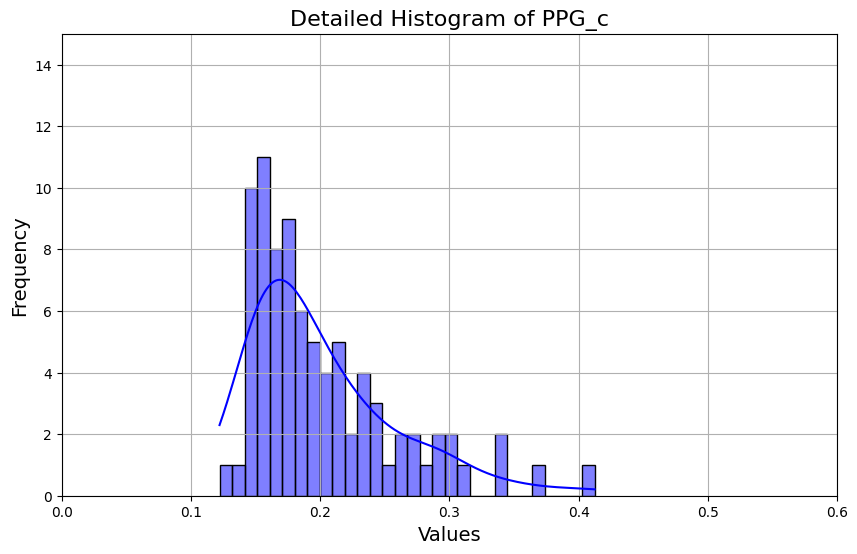

In [ ]:

# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['PPG_c'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(0, 0.6)  # X軸の範囲
plt.ylim(0, 15)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of PPG_c', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()

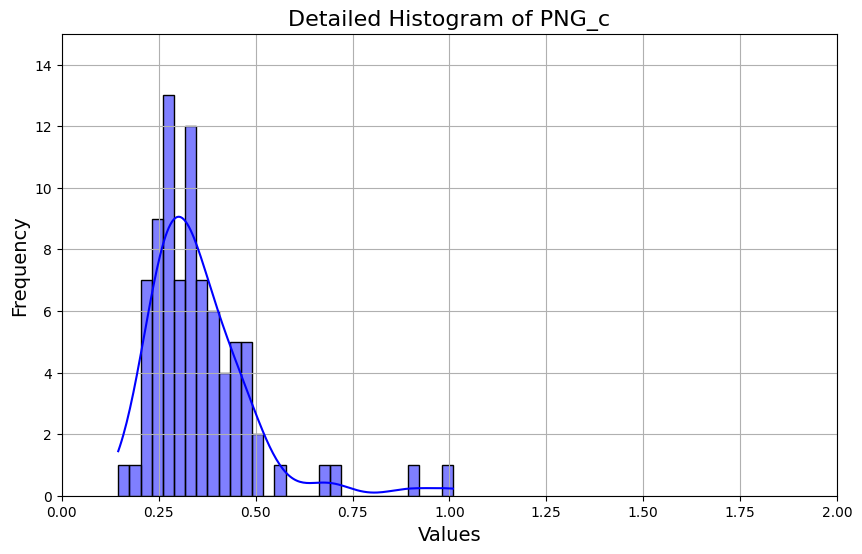

In [ ]:
# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['PNG_c'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(0, 2)  # X軸の範囲
plt.ylim(0, 15)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of PNG_c', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()

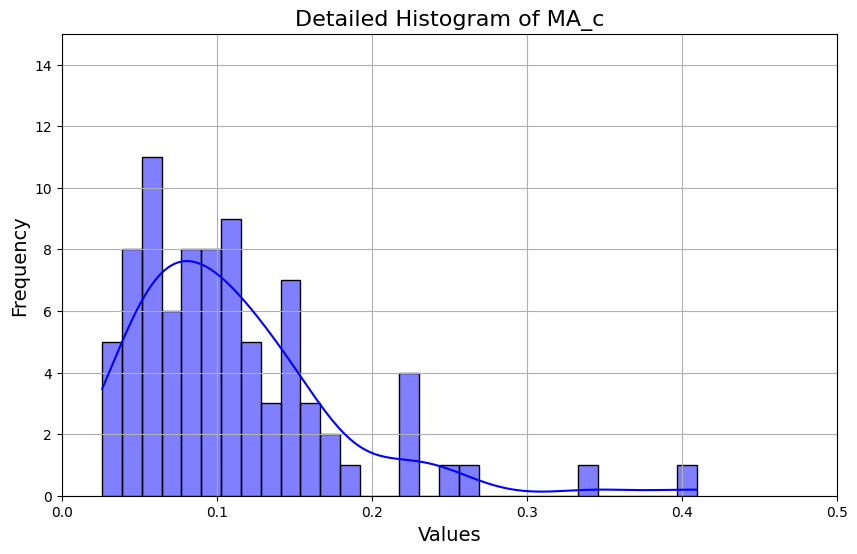

In [ ]:
# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['MA_c'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(0, 0.5)  # X軸の範囲
plt.ylim(0, 15)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of MA_c', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()

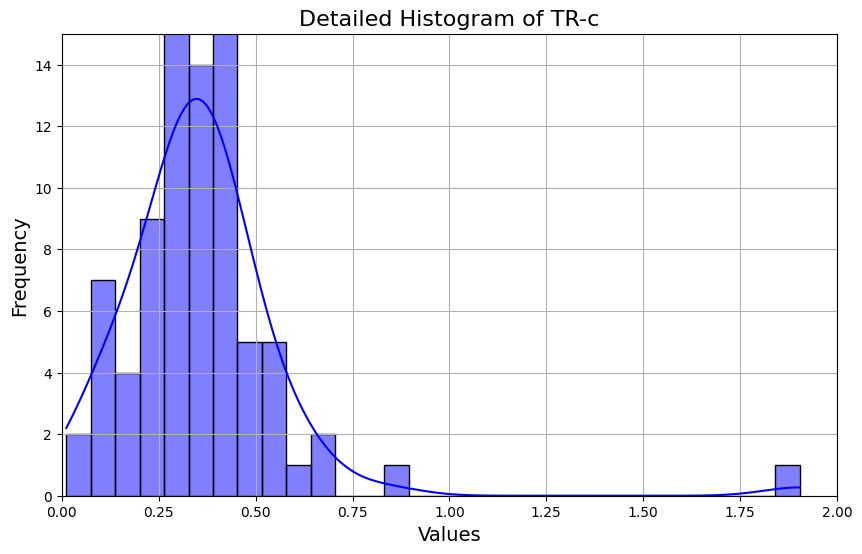

In [ ]:
# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['TR-c'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(0, 2)  # X軸の範囲
plt.ylim(0, 15)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of TR-c', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()

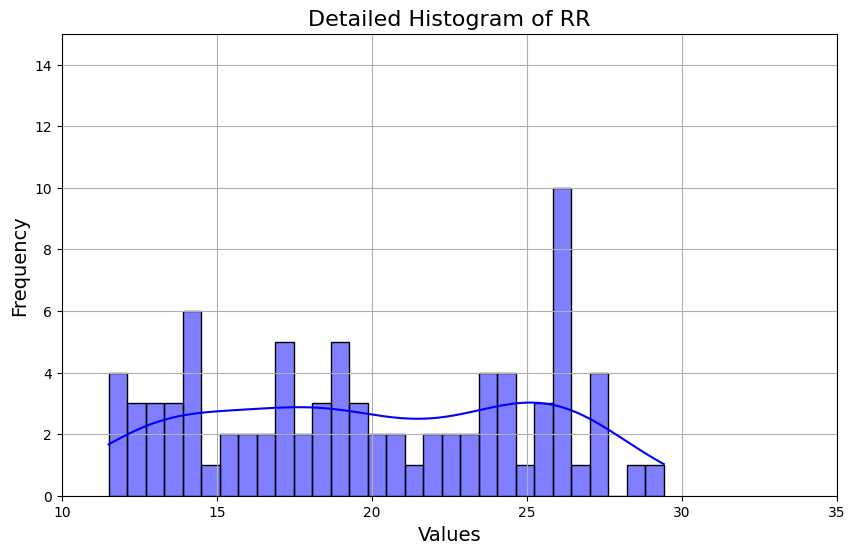

In [ ]:
# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['RR'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(10, 35)  # X軸の範囲
plt.ylim(0, 15)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of RR', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()

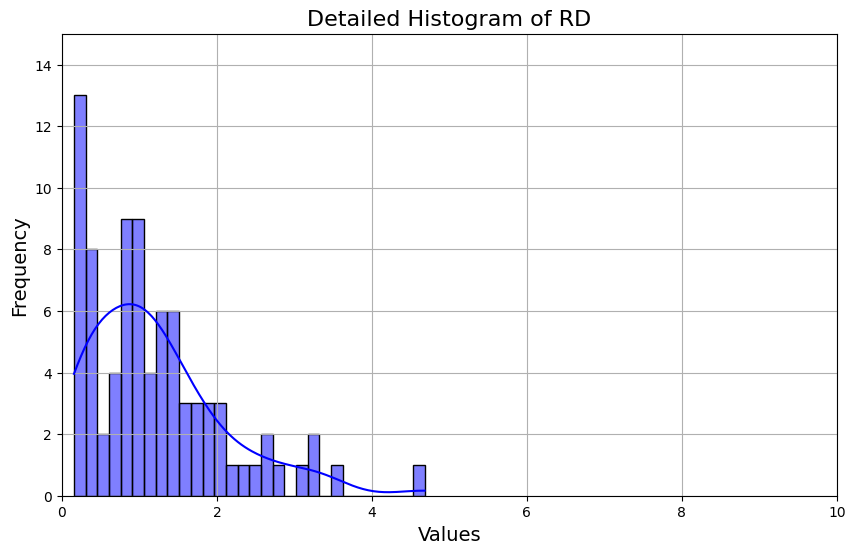

In [ ]:
# 'column_name' をヒストグラムを作りたい列名に置き換えてください
plt.figure(figsize=(10, 6))

# ヒストグラムのビンの数を設定 (例: 30)
bins = 30

# ヒストグラムを作成
sns.histplot(df['RD'], bins=bins, kde=True, color='blue', edgecolor='black')

# X軸とY軸の範囲を指定 (必要に応じて)
plt.xlim(0, 10)  # X軸の範囲
plt.ylim(0, 15)   # Y軸の範囲

# タイトルとラベルの設定
plt.title('Detailed Histogram of RD', fontsize=16)
plt.xlabel('Values', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# グリッドの表示
plt.grid(True)

# ヒストグラムを表示
plt.show()